Short Answer #6 of Week 4 Assignment.

After completing the programming assignment, adjust the l2 regularization on the notMIST logistic regression model. 
Try values 1, 0.1, 0.01, and 0. Which produces the lowest error? Why do you think this is the case?

### The regular data code for Week 4 Programming

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).as_matrix()



print X_temp.shape
print X.shape
print y.shape
X[1,:]

(28L, 28L, 18724L)
(18724L, 784L)
(18724L, 10L)


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)
print X_train.shape
print y_train.shape

(14979L, 784L)
(14979L, 10L)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.01)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Using Theano backend.
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`


In [6]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  0.5195267323339893


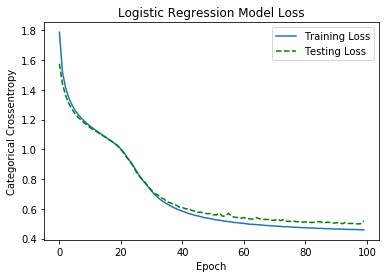

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### The value 0 in the l2 regularization setting

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Loss after final iteration:  0.48204233740296


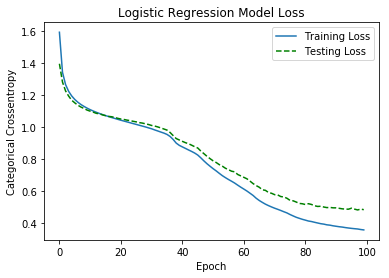

In [8]:
# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.00)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()


### The value 0.01 in the l2 regularization setting

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Loss after final iteration:  0.5086107872516036


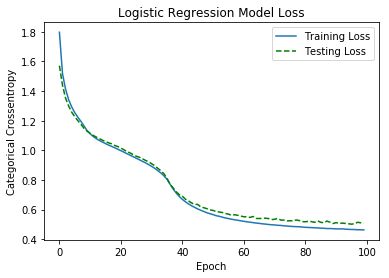

In [10]:
# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.01)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### The value 0.1 in the l2 regularization setting

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Loss after final iteration:  0.694118796028346


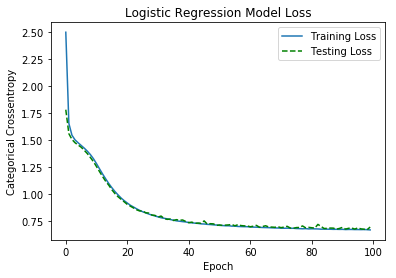

In [11]:
# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.1)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### The value 1.0 in the l2 regularization setting

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Loss after final iteration:  1.3086477371974685


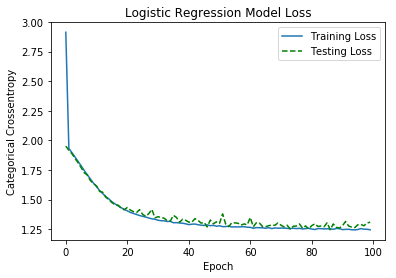

In [12]:
# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(1.0)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()